In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Exercicio 01

a = np.arange(25).reshape(5, 5)
print("Array\n", a)
print("Media das linhas 0, 2, 3:", np.mean(a[[0,2,3],:]))
print("Media das colunas 0, 1, 4:", np.mean(a[:,[0,1,4]]))


#mascara = np.zeros(5, dtype=np.bool_)
#x, y = np.shape(a)
#mascara[[x-1, y-1]] = True

#soma = np.sum(np.diagonal(a)) + np.sum(np.fliplr(a).diagonal())

soma = np.sum(a[[0], :] )

row = [0,1,2,3,4]
columns = [0,1,2,3,4]
columnsInv = [4,3,2,1,0]

#row = a[0 , :]
#columns =  a[: , 0]
#columnsInv =  a[: , 4]
#print(row, columns, columnsInv)


print(np.sum(a[row, columns]) + np.sum(a[row, columnsInv]))

Array
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
Media das linhas 0, 2, 3: 10.333333333333334
Media das colunas 0, 1, 4: 11.666666666666666
120


In [4]:
#Exercicio 02

a = np.arange(25).reshape(5, 5)

print("Array\n", a)

print("Array com pares e valores maiores que 10", a[(a%2 == 0) | (a > 10)])

Array
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
Array com pares e valores maiores que 10 [ 0  2  4  6  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [5]:
#Exercicio 03

a = np.random.randint(0, 50, (5, 5))

print("Array\n", a)

b = np.ndarray.flatten(a)
x = np.sort(b)

print("Selecionando os 5 menores valores do array", x[:5])

x[:5] = -1
    
print("Array depois:\n", x.reshape(5,5))

Array
 [[18 18 44 28 11]
 [21 47 41  1 11]
 [ 2  1 18 20 33]
 [ 7 27 34 46  2]
 [21 30 47  5 45]]
Selecionando os 5 menores valores do array [1 1 2 2 5]
Array depois:
 [[-1 -1 -1 -1 -1]
 [ 7 11 11 18 18]
 [18 20 21 21 27]
 [28 30 33 34 41]
 [44 45 46 47 47]]


Shape da imagem: (500, 900, 3), dtype: uint8


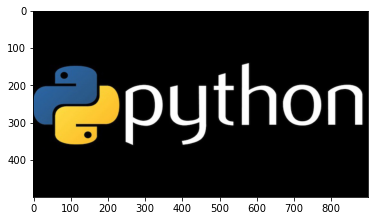

355848
355848


In [6]:
#Exercicio 04
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

image = np.array(Image.open('../semana_4/python_image.jpg'))
print('Shape da imagem: {}, dtype: {}'.format(image.shape, image.dtype))
plt.imshow(image)
plt.show()
print(np.sum(np.sum(image, axis=2) == 0))

a = np.sum(image[:, :, 0] == 0)
#b = np.sum(image[:, 0, :] == 0)
#c = np.sum(image[0, :, :] == 0)
#d = np.sum(image[0, 0, :] == 0)

#print(a)

print(np.sum(np.sum(image[:,:], axis=2) == 0))


In [7]:
#Exercicio 05

a = np.random.randint(0, 50, (5, 5))

print("Array\n", a)

k = int(input("Digite o k valores do array:"))

b = np.ndarray.flatten(a)
x = np.argsort(b)

print("Selecionando os k maiores valores do array(indices)", x[-k:])


Array
 [[22 38 43  2 22]
 [39 29  6 22  1]
 [23 32 36 16  2]
 [28 31 27 33 34]
 [43 49 43 35 39]]
Digite o k valores do array:5
Selecionando os k maiores valores do array(indices) [24  2 20 22 21]


3- O aplicativo mais caro da Play Store é o I'm Rich - Trump Edition custando R$ 400.0 reais.
4- Quantidade de Apps com Content Mature 17+ 499


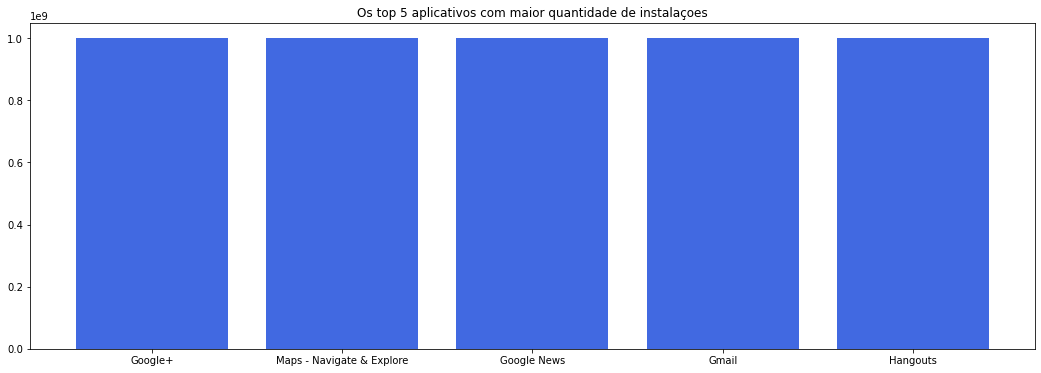

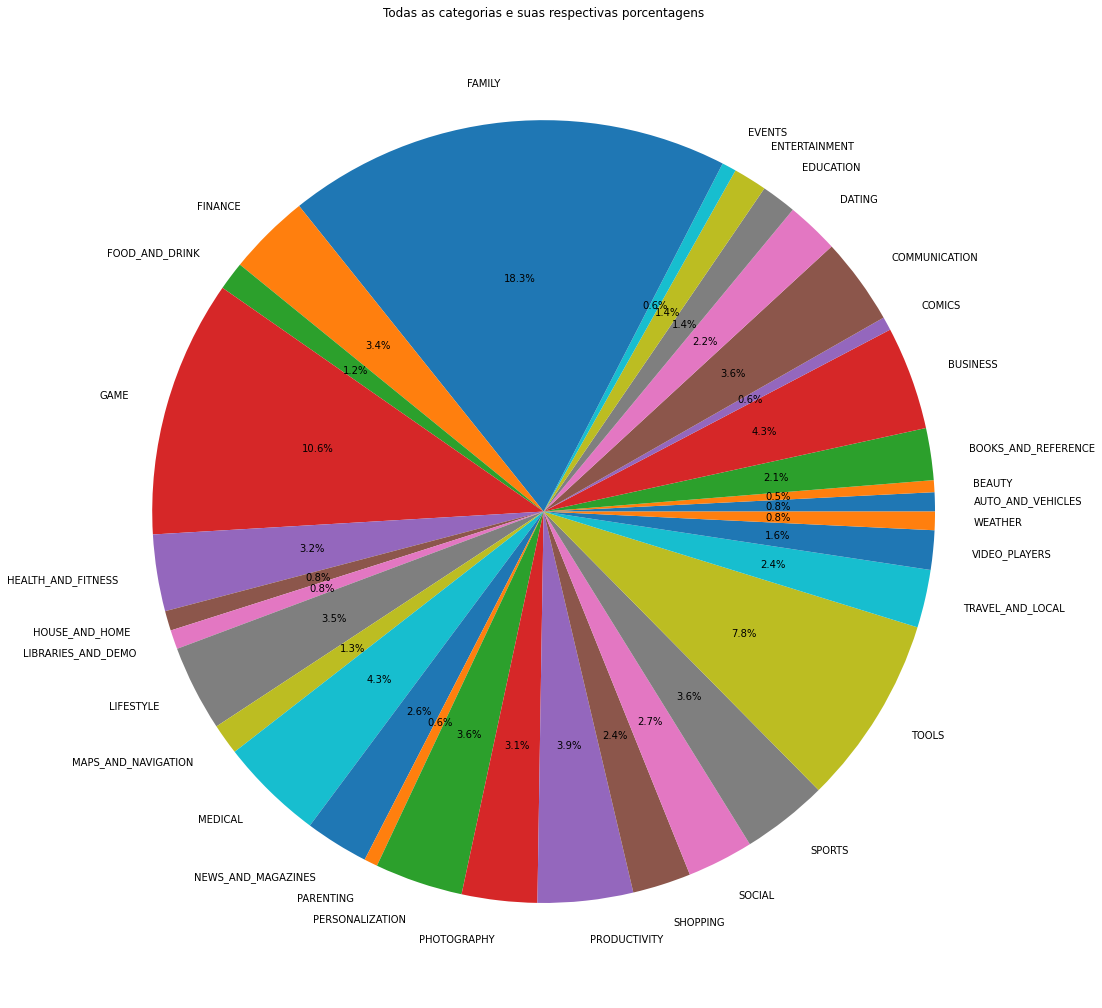

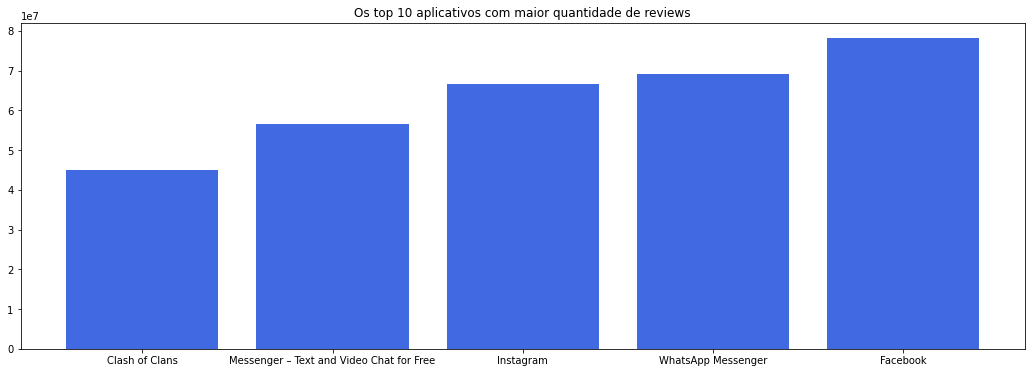

In [13]:
#Exercicio 06
import csv
import numpy as np
import matplotlib.pyplot as plt
dataset = {
    'App': [],
    'Category': [],
    'Reviews': [],
    'Installs': [],
    'Price': [],
    'Content Rating': [],
}

with open('../semana_4/googleplaystore.csv', 'r') as f:
    arquivo_csv = csv.reader(f, delimiter=',', quotechar='"')
    next(arquivo_csv)
    for i, row in enumerate(arquivo_csv):
        
        if i == 10472: #indice exato da linha com valores trocados
            continue
        
        dataset['App'].append(row[0])
        dataset['Category'].append(row[1])
        
        dataset['Reviews'].append(int(row[3].replace(',', '').replace('+', '')))
        dataset['Content Rating'].append(row[8])
        
        if row[7] != '0':
            dataset['Price'].append(float(row[7].replace('$', '')))
        else:
            dataset['Price'].append(float(row[7]))
                                    
        if row[5] == '0':
            dataset['Installs'].append(int(row[5]))
        else:
            dataset['Installs'].append(int(row[5].replace(',', '').replace('+', '')))


        
# convertendo tudo para np arrays
for k in dataset.keys():
    dataset[k] = np.array(dataset[k])


indice_top_5 = np.argsort(dataset['Installs'])[-7:]
unique, count = np.unique(dataset['Category'], return_counts=True)

#1

plt.figure(figsize=(18, 6))
plt.bar(dataset['App'][indice_top_5], dataset['Installs'][indice_top_5], color='royalblue')
plt.title("Os top 5 aplicativos com maior quantidade de instalaçoes")

#2
plt.figure(figsize=(18, 18))
plt.pie(count[1:], labels=unique[1:],  autopct='%1.1f%%')
plt.title('Todas as categorias e suas respectivas porcentagens')
#3
most_expensive_app = dataset['Price'].argmax()

print("3- O aplicativo mais caro da Play Store é o {} custando R$ {} reais.".format(dataset['App'][most_expensive_app], dataset['Price'][most_expensive_app]))

#4
print("4- Quantidade de Apps com Content Mature 17+", np.sum(dataset['Content Rating'] == 'Mature 17+'))

#5

top_10_review = np.argsort(dataset['Reviews'])[-15:]
#matriz = np.stack((dataset['App'][top_10_review], dataset['Reviews'][top_10_review]))
#print("Os 10 aplicativos com mais reviews são os:\n", dataset['App'][top_10_review],"\ncom respectivamente\n", dataset['Reviews'][top_10_review])


plt.figure(figsize=(18, 6))
plt.bar(dataset['App'][top_10_review], dataset['Reviews'][top_10_review], color='royalblue')
plt.title("Os top 10 aplicativos com maior quantidade de reviews")



plt.show()